<a href="https://colab.research.google.com/github/Drishya24-lab/InsightsHub/blob/main/FIFA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FIFA WorldCup**

******Data collection and preparation**

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Extract data from zip file
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/FIFA WC data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

1: Load the Datasets

In [14]:

import pandas as pd
world_cup_matches=pd.read_csv('WorldCupMatches.csv')
world_cup_players=pd.read_csv('WorldCupPlayers.csv')
world_cups=pd.read_csv('WorldCups.csv')

2: Explore the Datasets

In [15]:
# Display basic information about the datasets
print("World Cups Dataset Info:")
print(world_cups.info())
print("\nWorld Cup Matches Dataset Info:")
print(world_cup_matches.info())
print("\nWorld Cup Players Dataset Info:")
print(world_cup_players.info())

World Cups Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB
None

World Cup Matches Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    floa

In [16]:

# Display first few rows of each dataset
print("World Cup Matches dataset:")
print(world_cup_matches.head())

print("\nWorld Cup Players dataset:")
print(world_cup_players.head())

print("\nWorld Cups dataset:")
print(world_cups.head())


World Cup Matches dataset:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0               

 3: Handling Missing Values

In [17]:
print("Missing values in World Cups dataset:")
print(world_cups.isnull().sum())

print("\nMissing values in World Cup Matches dataset:")
print(world_cup_matches.isnull().sum())

print("\nMissing values in World Cup Players dataset:")
print(world_cup_players.isnull().sum())


Missing values in World Cups dataset:
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

Missing values in World Cup Matches dataset:
Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

Missing values in World Cup Players dataset:
RoundID              0
MatchID              0
Team Initials     

In [18]:
# Handle missing values
world_cup_matches_cleaned = world_cup_matches.dropna()
world_cup_players_cleaned = world_cup_players.dropna()

In [19]:
# Further preprocessing if needed
world_cup_matches_cleaned['Datetime'] = pd.to_datetime(world_cup_matches_cleaned['Datetime'], format='%d %B %Y - %H:%M ', errors='coerce')

<ipython-input-19-a0402a8d4614>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_cup_matches_cleaned['Datetime'] = pd.to_datetime(world_cup_matches_cleaned['Datetime'], format='%d %B %Y - %H:%M ', errors='coerce')


In [20]:
# Save cleaned datasets for later use
world_cup_matches_cleaned.to_csv('WorldCupMatches_Cleaned.csv', index=False)
world_cup_players_cleaned.to_csv('WorldCupPlayers_Cleaned.csv', index=False)

3:Data Visualization

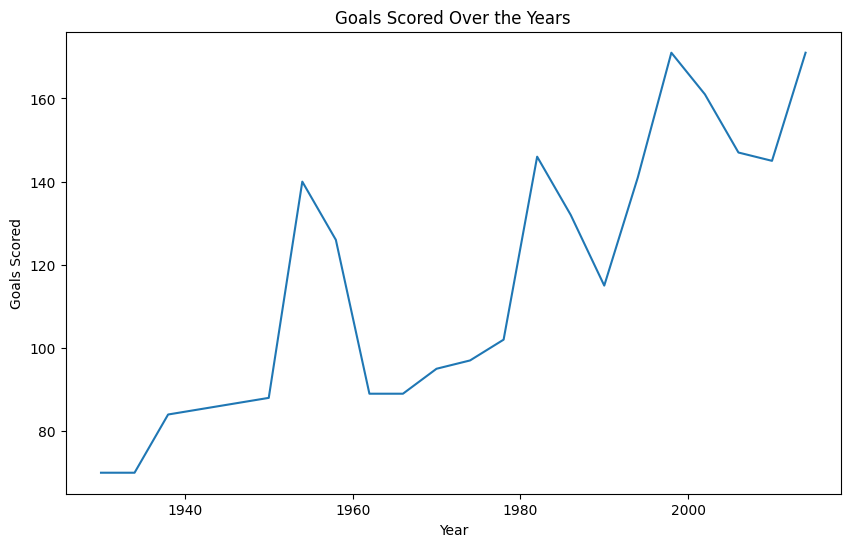

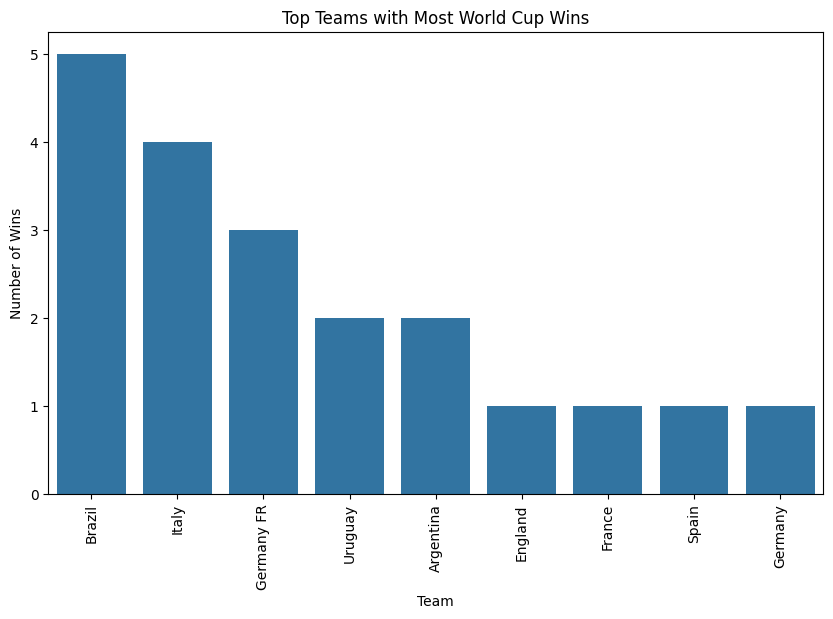

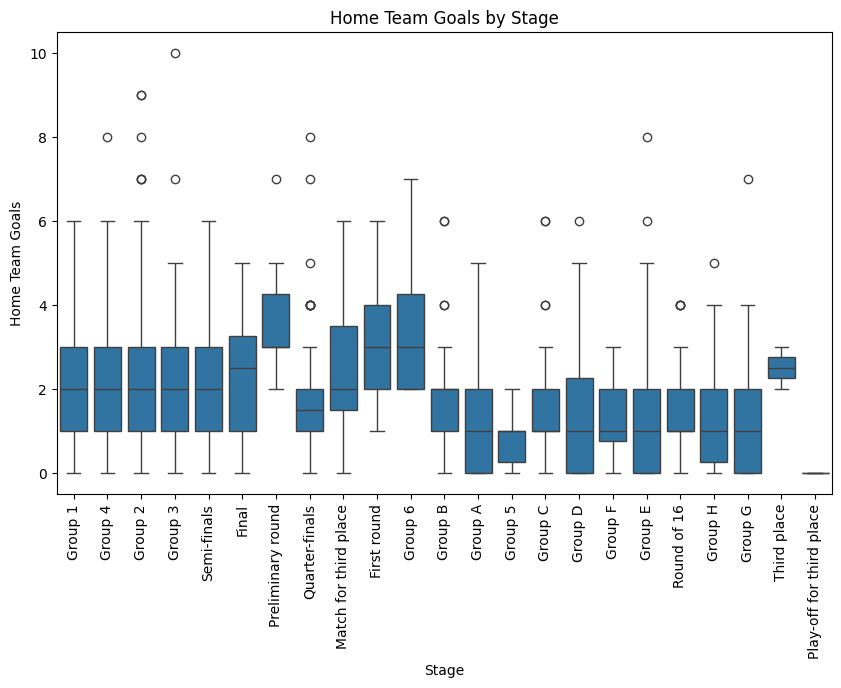

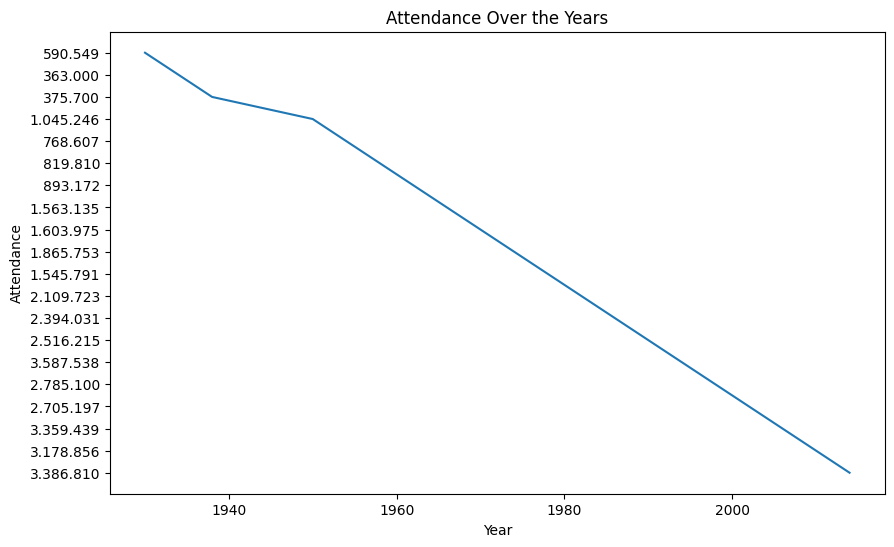

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Goals scored over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=world_cups, x='Year', y='GoalsScored')
plt.title('Goals Scored Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.show()

# Top teams with most World Cup wins
top_teams = world_cups['Winner'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams.index, y=top_teams.values)
plt.title('Top Teams with Most World Cup Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

# Analyzing match outcomes (home vs. away goals)
plt.figure(figsize=(10, 6))
sns.boxplot(data=world_cup_matches_cleaned, x='Stage', y='Home Team Goals')
plt.title('Home Team Goals by Stage')
plt.xlabel('Stage')
plt.ylabel('Home Team Goals')
plt.xticks(rotation=90)
plt.show()

# Analyzing attendance over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=world_cups, x='Year', y='Attendance')
plt.title('Attendance Over the Years')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.show()



4: Advanced Analysis and **Insights**




In [22]:
# Correlation between goals scored and attendance (both numeric columns)
# Convert 'Attendance' column to numeric, handling errors
world_cups['Attendance'] = pd.to_numeric(world_cups['Attendance'].str.replace('.', ''), errors='coerce')

goals_attendance_correlation = world_cups[['GoalsScored', 'Attendance']].corr()
print("Correlation between Goals Scored and Attendance:")
print(goals_attendance_correlation)


Correlation between Goals Scored and Attendance:
             GoalsScored  Attendance
GoalsScored      1.00000     0.77467
Attendance       0.77467     1.00000


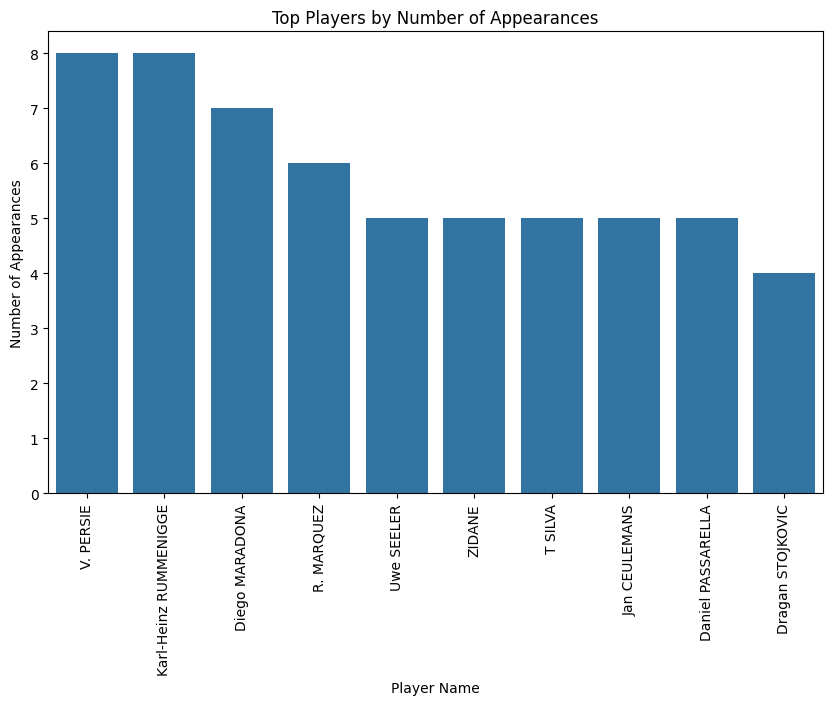

In [23]:
# Top players by performance (e.g., most goals scored, most appearances)
top_players = world_cup_players_cleaned['Player Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.index, y=top_players.values)
plt.title('Top Players by Number of Appearances')
plt.xlabel('Player Name')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=90)
plt.show()

In [24]:
# Feature Importance with RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


NameError: name 'X_train' is not defined

Code Enhancement (Feature Engineering):

<ipython-input-45-ee5acc68fed2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='decade', data=df, palette='viridis')


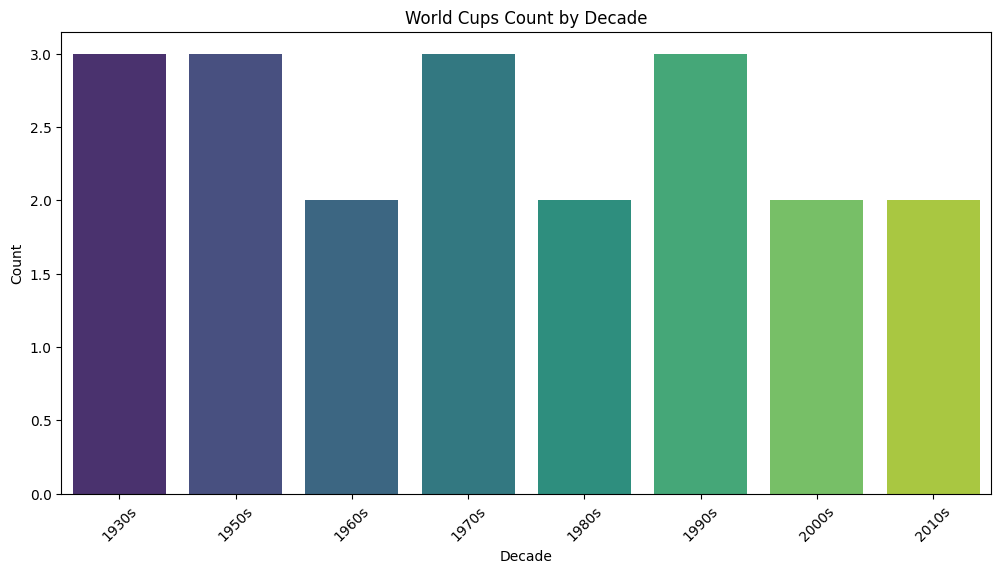

In [ ]:
import pandas as pd


df['decade'] = df['Year'].apply(lambda year: str(year)[:3] + '0s')  # Create decade categories (e.g., 1980s)
df['era'] = df['Year'].apply(lambda year: 'Early' if year < 1950 else ('Mid' if year < 2000 else 'Modern'))

# Visualize updated features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='decade', data=df, palette='viridis')
plt.title('World Cups Count by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
